In [118]:
import numpy as np
import networkx as nx

In [146]:
# initialize size of the graph
num_nodes = 15
num_edges = 20


# a list of all the nodes that begin alive. nodes are indexed 0 through num_nodes - 1
initial_life_pattern = [0]

state = [False] * num_nodes
for i in initial_life_pattern:
    state[i] = True

initial_state = state


# add nodes to the graph
G = nx.Graph()
G.add_nodes_from([x for x in range(num_nodes)])


# randomly add edges to the graph. to manually add edges, comment out the for loop and list the tuples of nodes in edge_list
edge_list = []
for _ in range(num_edges):
    edge = np.random.choice(G.nodes(), size=2, replace=False)
    edge_list.append(edge)

G.add_edges_from(edge_list)


# alive nodes appear green, dead nodes appear black
def color_map(alive):
    if alive:
        return 'green'
    return 'black'

In [147]:
''' 
Game of Life on Graphs function:

    G - networkx graph
    state - boolean list representing current life pattern
    a - alive nodes will die if they have less than 'a' alive neighbors (underpopulation)
    d - alive nodes will die if they have less than 'd' dead neighbors (overpopulation)
    r - dead nodes will come to life if they have exactly 'r' alive neighbors (reproduction)

    returns the updated state

'''
def GLG(G, state, a, d, r):

    new_state = []
    for e in state:
        new_state.append(e)

    for node, alive in enumerate(state):
        neighbors = list(G[node])
        neighbor_states = [state[neighbor] for neighbor in neighbors]
        alive_neighbors = neighbor_states.count(True)
        dead_neighbors = neighbor_states.count(False)
        
        if alive and (alive_neighbors < a or dead_neighbors < d):
            new_state[node] = False
        if not alive and alive_neighbors == r:
            new_state[node] = True

    nx.draw(G, nx.spring_layout(G, seed=2023), with_labels=True, font_color='white', font_weight='bold', node_color=list(map(color_map, new_state))) # spring_layout
    # nx.draw(G, nx.shell_layout(G), with_labels=True, font_color='white', node_color=list(map(color_map, new_state))) # shell layout

    return new_state


# returns whether the GLG dies or repeats within a given time limit
def lifetime(time_limit):
    state = initial_state
    state_history = [state]
    
    for t in range(time_limit):
        state = GLG(G, state, 1, 1, 1)
        state_history.append(state)
        if state == [False] * num_nodes:
            state = initial_state
            return f'dies at t = {t + 1}'
        
        for i, past_state in enumerate(state_history[:-1]):
            if state == past_state:
                state = initial_state
                cycle_length = t + 1 - i
                if cycle_length == 1:
                    return f'stable at STATE {t}'
                return f'repeats at STATE {t + 1}, returning to STATE {i}, with a cycle lenth of {cycle_length}'
    return 'does not die or repeat within time limit'

## Determine the lifetime of the GLG

'repeats at STATE 9, returning to STATE 3, with a cycle lenth of 6'

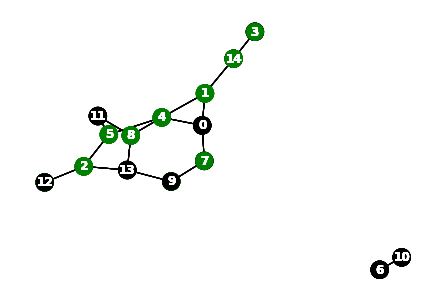

In [148]:
lifetime(time_limit=100)

## Run the GLG step by step

STATE 0


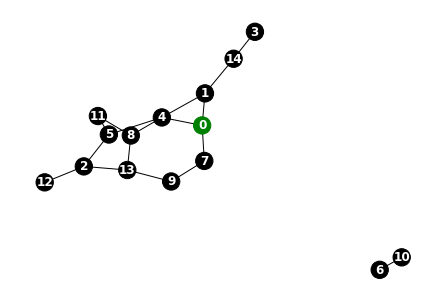

In [149]:
nx.draw(G, nx.spring_layout(G, seed=2023), with_labels=True, font_color='white', font_weight='bold', node_color=list(map(color_map, state)))
print('STATE 0')

STATE 1


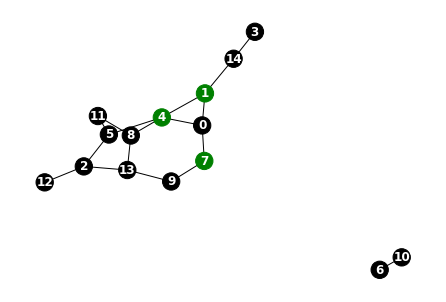

In [150]:
state = GLG(G, state, 1, 1, 1)
print('STATE 1')

STATE 2


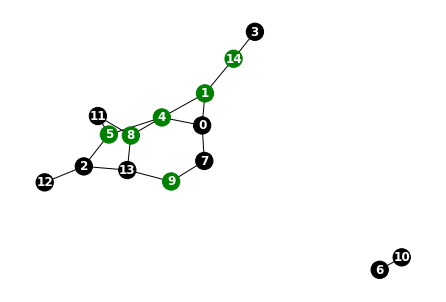

In [151]:
state = GLG(G, state, 1, 1, 1)
print('STATE 2')

STATE 3


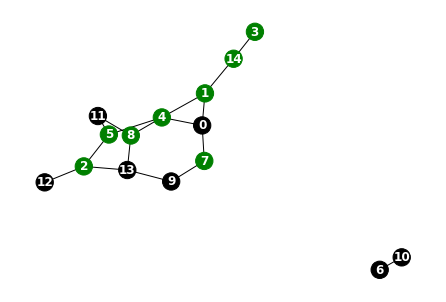

In [152]:
state = GLG(G, state, 1, 1, 1)
print('STATE 3')

STATE 4


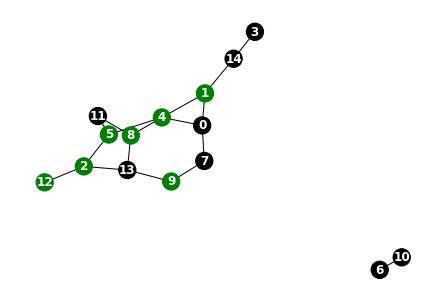

In [153]:
state = GLG(G, state, 1, 1, 1)
print('STATE 4')

STATE 5


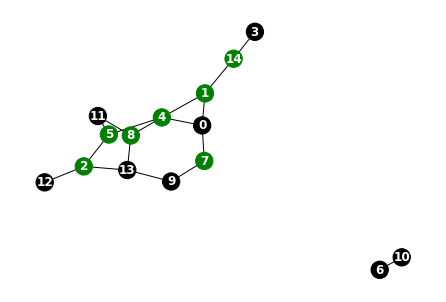

In [154]:
state = GLG(G, state, 1, 1, 1)
print('STATE 5')

STATE 6


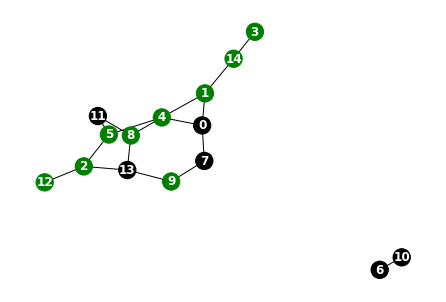

In [155]:
state = GLG(G, state, 1, 1, 1)
print('STATE 6')

STATE 7


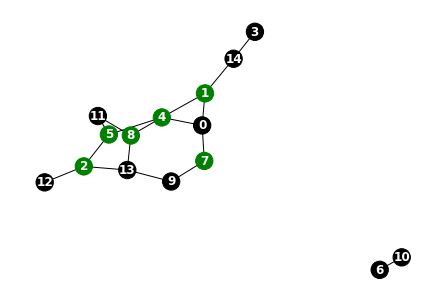

In [156]:
state = GLG(G, state, 1, 1, 1)
print('STATE 7')

STATE 8


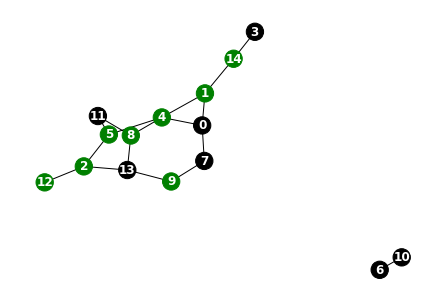

In [157]:
state = GLG(G, state, 1, 1, 1)
print('STATE 8')

STATE 9


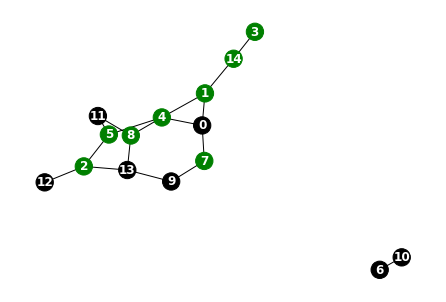

In [158]:
state = GLG(G, state, 1, 1, 1)
print('STATE 9')

STATE 10


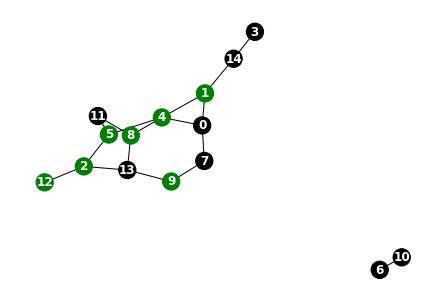

In [159]:
state = GLG(G, state, 1, 1, 1)
print('STATE 10')